# (E7) 나랑 닮은 연예인을 찾아보자

- 일시: 2020.01.28

# Step 1. 사진 모으기

**- 내 얼굴 사진 3장을 구합니다. ```~/aiffel/face_embedding/pr_images```에 이미지를 넣어줍니다.** 

**- 비교할 연예인 사진은 슬랙에서 변호윤 퍼실님께서 올려주신 한국 셀럽들 사진을 다운받고 일부는 제가 더 추가했습니다. 연예인 사진은 총 269장입니다.. 압축을 풀어준 후, ```~/aiffel/face_embedding/pr_images```에 사진들을 풀어서 옮겨놓았습니다.**

# Step 2. 얼굴 영역 자르기

**- 내 얼굴 영역 자르기(안경 착용)**

[(603, 1668, 1402, 869)]


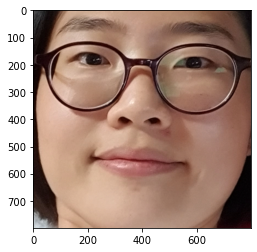

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/곽정은1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 얼굴 영역의 좌표를 출력.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face) # 잘라낸 얼굴 영역만 출력

In [2]:
# 얼굴 영역 자르기 함수.
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

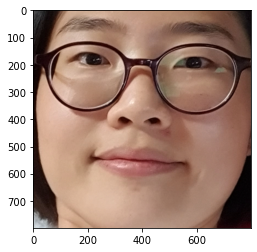

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/곽정은1.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

**- 연예인 얼굴 영역 자르기**

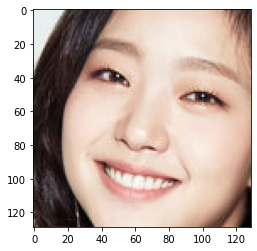

In [4]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/김고은.png'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# Step 3. 얼굴 영역의 임베딩 추출하기

**- 얼굴 사진들 디렉토리 확인**

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['obama.jpg', '윤경신.jpg', '황정민.jpg', '줄리엔강.png', '오재원.jpg', '김고은.png', '서현진.jpg', '이명박.jpg', '찬열.jpeg', '대도서관.jpeg', '매드클라운.jpeg', '김경진.png', '마동석.jpeg', '전소미.jpg', '아이유.jpg', '김윤석.jpeg', '이광수.jpg', '조정석.jpg', '박성호.jpg', '미미.jpg', '제이크 질렌할.jpeg', '박항서.jpg', '톰 홀랜드.jpg', '공유.jpg', '화사.jpg', '크리스 햄스워스.jpg', '문별.jpg', '승희.jpeg', '러블리즈예인.jpg', '방시혁.jpeg', '백현.jpg', '손흥민.jpg', '시우민.jpg', '숀 코네리.jpg', '다니엘 크레이그.jpeg', '티모시 달튼.jpeg', '이승철.jpeg', '류승범.jpg', '이진호.jpeg', '박진영.jpg', '김대중.jpg', '정우성.jpeg', '브래들리 쿠퍼.jpg', '이솜.jpg', '슬리피.jpg', '박명수.jpg', '정수빈.jpg', '봉준호.jpg', '존 파브르.jpeg', '크리스탈.jpg', '김다미.jpg', '이근대위.jpeg', '앤드류 응.png', '잇지예지.jpeg', '채연.jpg', '벤 에플렉.jpeg', '아린.jpg', '케이.jpg', '택연.jpg', '박희순.jpg', '이성민.jpg', '제니.jpg', '주호민.jpeg', '최준석.jpg', '주진모(올드).jpg', '윤균상.jpg', '류준열.jpg', '슈퍼비.jpeg', '김영삼.jpeg', '진.jpg', '노무현.jpeg', '이동국.jpeg', '정국.jpg', '태양.jpeg', '레인보우재경.jpg', '트와이스쯔위.jpg', '서강준.jpg', '곽정은4.jpg', '무라니시.png', '로저 무어.jpeg', '리아.jpg', '지호.jpg', '꽈두룹.jpeg', '김광현.jpg', '

**- 내 얼굴 사진 벡터 구하기**

In [6]:
import numpy as np

image_file = os.path.join(dir_path, '곽정은1.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수.

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수.
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face) 
embedding # 리스트

print(type(embedding)) # 타입을 확인해보니 리스트 맞음.

a = np.array(embedding) # 128차원이 맞는지 확인하기 위해 array로 변환.
print(a.shape) # (1, 128) 1행 128열.

print(embedding) # 얘도 역시 리스트, 128차원.

<class 'list'>
(1, 128)
[array([-0.07347561,  0.05766579,  0.04552832, -0.07683185, -0.13635118,
       -0.04648813, -0.08837649, -0.133734  ,  0.10709433, -0.17340997,
        0.17714012, -0.08595807, -0.17685272, -0.01861723, -0.02950682,
        0.18263343, -0.19593047, -0.08663022, -0.02271221, -0.01706648,
        0.07555545,  0.03168508,  0.01450088,  0.03333282, -0.05719288,
       -0.37859085, -0.14210354, -0.08318214, -0.02615093, -0.01055643,
       -0.06797045,  0.03536029, -0.11656996, -0.00844566,  0.03287132,
        0.10080717, -0.05132426, -0.13094133,  0.16170007, -0.03288582,
       -0.25075236,  0.05658276,  0.09239558,  0.18688132,  0.17524415,
        0.02971568,  0.01920304, -0.11922881,  0.11245739, -0.15276872,
        0.03087092,  0.13518806,  0.01991691,  0.04306246,  0.0509878 ,
       -0.10958179,  0.07146731,  0.10388877, -0.15743749, -0.03470572,
        0.115226  , -0.09429731, -0.00333286, -0.04817721,  0.25915465,
        0.13381377, -0.10692126, -0.198

In [7]:
# 내 얼굴 벡터를 저장하는 함수.
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김.
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        if len(face) == 0: continue # 얼굴 인식 실패 시 embedding_dict에 추가하지 않음.
    return embedding_dict

In [24]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['곽정은4']

array([-0.12994875,  0.08280067,  0.04136782, -0.13582566, -0.13230357,
       -0.07426345, -0.10592187, -0.14118101,  0.12321721, -0.130079  ,
        0.18893488, -0.10138091, -0.16425902, -0.0809336 , -0.06039378,
        0.19279645, -0.20417313, -0.09579865, -0.03832577,  0.00371272,
        0.15124588,  0.04260376, -0.01380269,  0.06740316, -0.10165423,
       -0.32111821, -0.10072168, -0.04316295,  0.002627  , -0.03666305,
       -0.0628084 ,  0.01860649, -0.20741609, -0.05004667,  0.01177738,
        0.12077161,  0.00089265, -0.10606395,  0.11299957, -0.01216524,
       -0.26164326,  0.05115988,  0.0700352 ,  0.15704216,  0.18662514,
        0.00608934,  0.01490634, -0.15563521,  0.14775118, -0.16164795,
        0.01870522,  0.13377666,  0.05290361,  0.04541281,  0.04905928,
       -0.11549109,  0.04021595,  0.15045781, -0.13435285, -0.01924224,
        0.10229082, -0.06545178, -0.0272027 , -0.12555765,  0.18576889,
        0.11848712, -0.09786072, -0.21320425,  0.13435331, -0.12

In [9]:
# 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리를 구하는 함수. 
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

'%0.10f' % float(get_distance('곽정은1', '딕헌터'))

'0.5503174076'

*****

## 미니 실험

In [10]:
# 내 얼굴끼리의 거리는? 곽정은1은 안경 착용, 곽정은4는 안경 미착용. 
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

'%0.10f' % float(get_distance('곽정은1', '곽정은4'))

'0.3969057557'

In [11]:
# 내 얼굴끼리의 거리는? 곽정은1은 안경 착용, 곽정은3도 안경 착용. 
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

'%0.10f' % float(get_distance('곽정은1', '곽정은3')) 

'0.4363766877'

**- 어째서 안경을 쓴 사진끼리 비교한 게 더 거리가 멀까?**

 저는 안경을 쓴 사진을 비교했을 때의 거리가 안경을 쓰지 않은 사진과 비교했을 때 거리보다 가까울 것이라고 예상했습니다. 왜냐하면 기준 사진이 안경을 쓴 사진이었기 때문이었습니다. 하지만 결과는 안경을 쓰지 않은 사진과의 거리가 더 가까웠습니다. 이유를 고민해본 결과, 유사도에 영향을 미치는 것이 얼굴의 모습만은 아니라는 결론에 도달했습니다.    

 사실 '곽정은1'과 '곽정은4'는 같은 날에 집 거실에서 찍은 사진입니다. 단지 안경을 쓰고 벗은 것 밖에 차이점이 없죠. 그래서 조명 상황이나 다른 환경적 요소들이 같았습니다. 하지만 '곽정은3'은 제 방에서 찍은 사진이었습니다. 장소가 다른 만큼 조명도 달랐을 것이기도 하고, 옷 때문에 얼굴이 조금 가려져서 유사도가 낮게 나왔을 수도 있을 것 같습니다.       
 
 안경을 벗어도 제 얼굴은 제 얼굴이군요. 안경을 벗는다고 미소녀가 되는 그런 일은 역시 애니메이션에만 있는 일이었던 겁니다.

*****

# Step 4. 모은 연예인들과 비교하기

In [12]:
def get_sort_key_func(name1): # 기준점.
    def get_distance_from_name1(name2): # 기준점과 비교할 인자.
        return get_distance(name1, name2) # 두사이의 거리.
    return get_distance_from_name1

sort_key_func = get_sort_key_func('곽정은1')
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('곽정은1') 라고 호출할 때
# 곽정은1과 name2 사이의 임베딩 벡터 거리를 계산.
print("done")

done


In [13]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('곽정은1',
  array([-0.07347561,  0.05766579,  0.04552832, -0.07683185, -0.13635118,
         -0.04648813, -0.08837649, -0.133734  ,  0.10709433, -0.17340997,
          0.17714012, -0.08595807, -0.17685272, -0.01861723, -0.02950682,
          0.18263343, -0.19593047, -0.08663022, -0.02271221, -0.01706648,
          0.07555545,  0.03168508,  0.01450088,  0.03333282, -0.05719288,
         -0.37859085, -0.14210354, -0.08318214, -0.02615093, -0.01055643,
         -0.06797045,  0.03536029, -0.11656996, -0.00844566,  0.03287132,
          0.10080717, -0.05132426, -0.13094133,  0.16170007, -0.03288582,
         -0.25075236,  0.05658276,  0.09239558,  0.18688132,  0.17524415,
          0.02971568,  0.01920304, -0.11922881,  0.11245739, -0.15276872,
          0.03087092,  0.13518806,  0.01991691,  0.04306246,  0.0509878 ,
         -0.10958179,  0.07146731,  0.10388877, -0.15743749, -0.03470572,
          0.115226  , -0.09429731, -0.00333286, -0.04817721,  0.25915465,
          0.13381377, -0.106

In [14]:
def get_nearest_face(name, top = 10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외.
            continue
      
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [25]:
get_nearest_face('곽정은1')

순위 1 : 이름(곽정은4), 거리(0.3969057557495763)
순위 2 : 이름(하현우), 거리(0.4115710837919423)
순위 3 : 이름(디오), 거리(0.41819605695618006)
순위 4 : 이름(최양락), 거리(0.4299025422777625)
순위 5 : 이름(아이유), 거리(0.43192790546284615)
순위 6 : 이름(곽정은3), 거리(0.43637668771330224)
순위 7 : 이름(매드클라운), 거리(0.43918889823810503)
순위 8 : 이름(손예진), 거리(0.44099195637598276)
순위 9 : 이름(강미나), 거리(0.44122702617889237)
순위 10 : 이름(서현진), 거리(0.44318018959620964)


# Step 5. 다양한 재미있는 시각화 시도해 보기

## 저분들과 제가 정말 닮았나요?

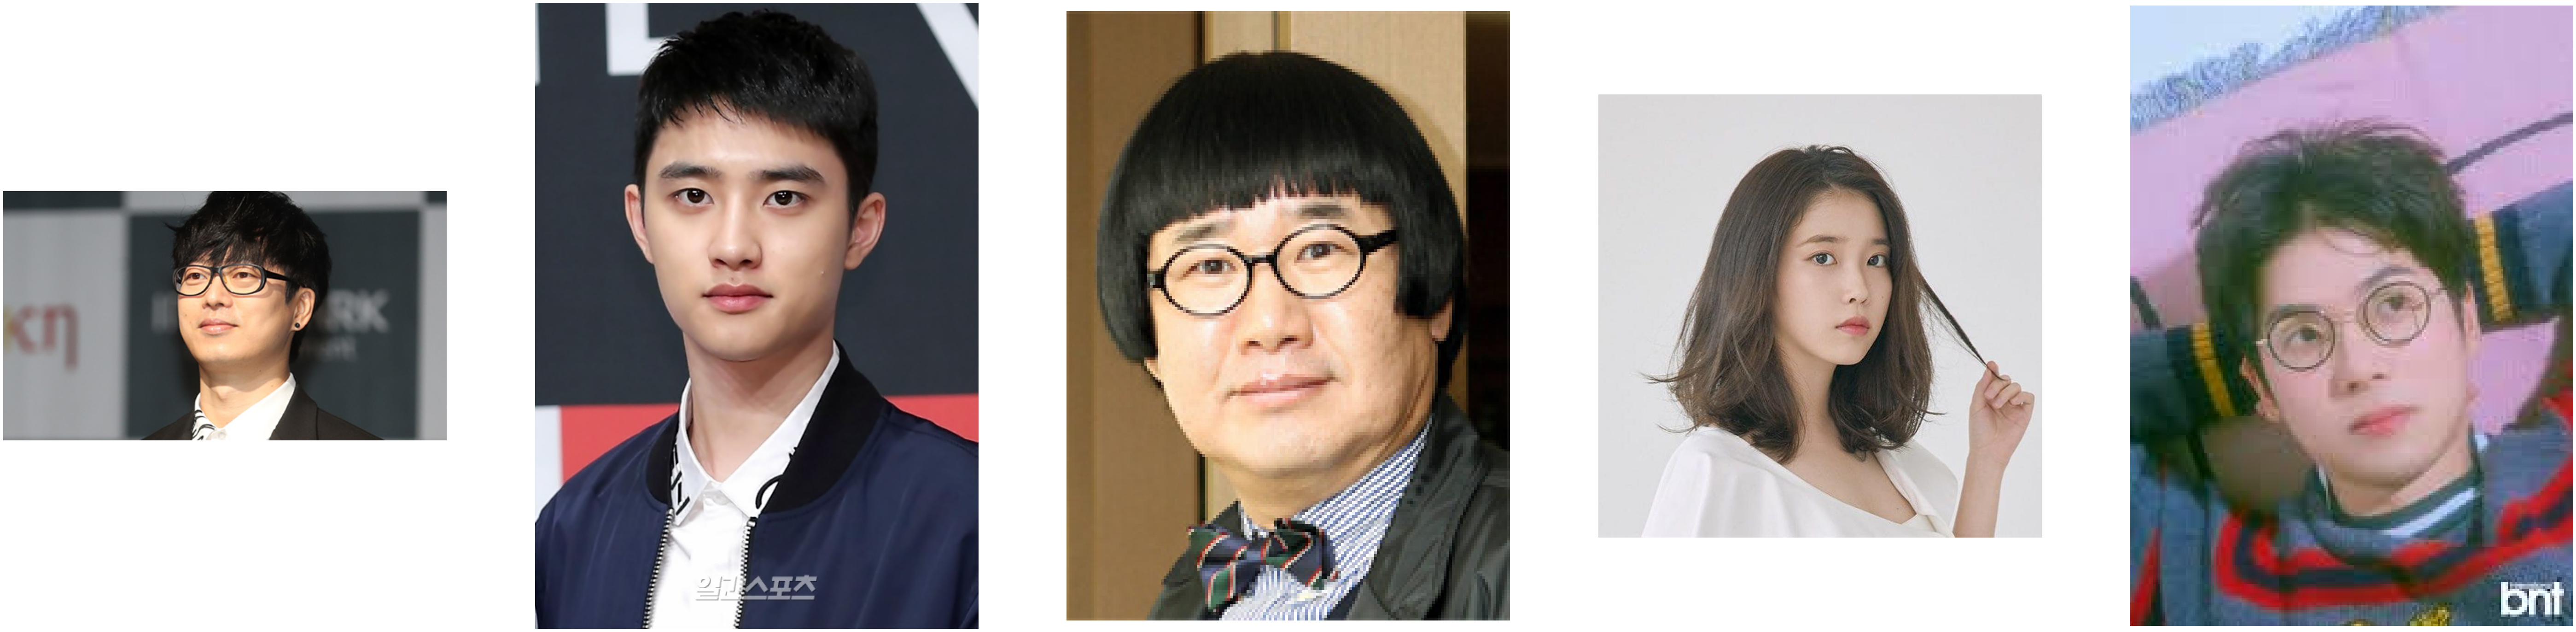

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

os.getcwd() 
os.chdir(os.getenv('HOME')+'/aiffel/face_embedding/pr_images')

img1 = cv2.imread('하현우.jpg') 
img2 = cv2.imread('디오.jpeg') 
img3 = cv2.imread('최양락.jpg') 
img4 = cv2.imread('아이유.jpg') 
img5 = cv2.imread('매드클라운.jpeg') 

# 가장 닮은 연예인들 얼굴 나열하기 
fig = plt.figure(figsize=(100,100))
rows = 1
cols = 5

ax1 = fig.add_subplot(rows, cols, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.

ax2 = fig.add_subplot(rows, cols, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.

ax3 = fig.add_subplot(rows, cols, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.

ax4 = fig.add_subplot(rows, cols, 4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.

ax5 = fig.add_subplot(rows, cols, 5)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)) # cv는 BGR로 나오므로 변환.
plt.axis("off") # 축 제거.

plt.show()

# 루브릭 평가

|평가문항|상세기준
|:------|:------|
|1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.|닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.|
|2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.|다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.|
|3. 다양하고 재미있는 결과 시각화를 시도하였다.|matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.|

1. 제 얼굴 이미지가 있어서 닮은 사람으로 제 사진이 나오길래 top = 10으로 지정해두어 제 얼굴 말고도 유사도가 높은 연예인이 나올 수 있도록 했습니다.     그 결과 제 얼굴인 1위과 6위를 제외하면 닮은 연예인 Best 5는 다음과 같습니다.    

|나와 가장 닮은 연예인|
|------|
|**순위 2위 하현우(거리: 0.4115710837919423)**|    
|**순위 3위 디오(거리: 0.41819605695618006)**|     
|**순위 4위 최양락(거리: 0.4299025422777625)**|    
|**순위 5위 아이유(거리: 0.43192790546284615)**|    
|**순위 7위 매드클라운(거리: 0.43918889823810503)**|    

 한때 국카스텐 노래를 엄청 들었는데, 그때는 그닥 닮았다는 생각을 하지 않았습니다. 지금도 하현우님과 많이 닮았다는 결과가 신기할 따름입니다.하현우님은 저보단 귀여운 개구리 상이죠 :)   
 
 그리고 가끔 단발로 머리를 자르면 최양락님 닮은 것 같다고 장난으로 말하고 다녔는데, 이렇게 벡터로 확인시켜주니까 살짝 '정말 닮은 건가'싶어서 단발을 하지 말아야 할지 고민이 됩니다.    
 
 저는 무쌍이라서 나름 무쌍 여자 연예인 사진을 많이 찾아서 넣었는데 하나도 순위에 든 사람이 없었습니다. 대신 남자 연예인들과 이렇게 많이 닮았다고 나올 줄은 몰랐습니다.그래도 아이유님이 계시는군요. 하지만 '나는 얼굴 벡터 거리가 아이유님과 0.5 미만이니까 우린 닮은거야.'라고 말하고 다니기엔 맞을 것 같아 무섭습니다. 저와 아이유님이 좀 닮았다는 건 저랑 이 노드를 보시는 여러분만의 비밀입니다 :) 

2. 총 269장의 연예인 사진을 사용하여 닮은 꼴의 연예인을 찾았습니다. 순위를 10위까지 지정했음에도 임베딩 거리는 모두 0.5 이내였습니다.     
제가 참 보편적으로 생겼다는 것을 깨달았습니다.

3. ```matplotlib```를 이용하여 닮은 꼴로 나온 연예인들의 사진을 나열해보았습니다. 기존에 썼던 이미지 출력방법은 한 열에 사진이 하나씩 밖에 나오지 않아 5명의 사진을 출력하면 스크롤이 길어지는 현상이 발생했습니다. 저는 스크롤이 길어지면 사진을 보는 것이 불편하다고 판단해 cv2를 이용하여 사진을 일렬로 나열하는 방법을 사용했습니다. 이렇게 하면 스크롤도 짧아짐과 동시에 나열된 연예인들끼리의 얼굴이 비슷한지도 비교하기에 수월하다고 생각합니다.

# 회고

오랜만에 가볍게 즐긴 노드였습니다. 모델 학습이 없으니까 너무 좋군요! 그리고 노드 정리도 깔끔하게 한 것 같아 기분이 산뜻합니다.        

한 가지 아쉬운 점은 비교할 사진의 양이 적었다는 것입니다. 사진이 더 많았다면 제 얼굴 벡터와의 거리가 굉장히 짧은 닮은꼴 연예인을 찾을 수 있지 않았을까합니다.       

다양한 시각화 방법에 Flask가 있어서 처음 검색해서 찾아봤습니다. 주피터 노트북으로 'Hello World!'하는 법을 찾아봤었는데, 웹 페이지가 로드만 되고 결과가 안나와서 Flask와의 첫만남은 그렇게 로딩으로 끝나버렸습니다. 그래도 Flask가 있다는 것만 알았는데 실제로 해보니 신기했습니다. 다른 언어보다 구현이 쉬운 것 같다고 느꼈습니다.(물론 웹페이지 만들어 본 적은 없습니다 :)) 파이썬은 웹 개발? 쪽으로는 힘든 언어라고 알고 있었는데, Flask가 전용 프레임워크가 였다니 놀라울 따름이었습니다. 덕분에 제가 잘못 알고 있던 사실을 바로 잡을수 있었습니다.